# ANÁLISIS Y VISUALIZACIONES

In [2]:
#Importamos librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Importamos los DF limpios
films = pd.read_csv('../Data/clean_films.csv', index_col=0)
series = pd.read_csv('../Data/clean_series.csv', index_col=0)

In [10]:
films.head(5)

,film_id,title,original_language,genre_ids,release_date,popularity,vote_average,vote_count,id,genre,release_year,release_month
0,565770,Blue Beetle,en,28,2023-08-16,2973,7.2,956,28,Action,2023,August
1,762430,Retribution,en,28,2023-08-23,1485,6.9,236,28,Action,2023,August
2,615656,Meg 2: The Trench,en,28,2023-08-02,1323,7.0,1973,28,Action,2023,August
3,385687,Fast X,en,28,2023-05-17,1183,7.3,3867,28,Action,2023,May
4,980489,Gran Turismo,en,28,2023-08-09,977,7.8,473,28,Action,2023,August


In [11]:
series.head(5)

,serie_id,name,origin_country,popularity,vote_average,vote_count,num_episodes,episode_duration,first_air_date,genre,release_year,release_month
0,94722,Tagesschau,DE,3359,7.5,147,20839,15.0,1952-12-26,News,1952,December
1,101463,Al rojo vivo,ES,2465,3.0,15,298,200.0,2011-01-10,News,2011,January
2,2224,The Daily Show,US,1694,6.3,452,3830,26.0,1996-07-22,News,1996,July
3,1655,PBS NewsHour,US,569,5.4,42,2591,57.0,1975-10-20,News,1975,October
4,154300,Euronews Hoy,ES,566,4.8,10,647,30.0,2019-01-28,News,2019,January


## `Películas`

- #### Películas a lo largo de los años

In [19]:
#En primer lugar, vamos a centrar el estudio del análisis hasta el año 2023, no vamos a contar con las películas que se estrenen posteriormente

films = films[films['release_year'] <= 2023]

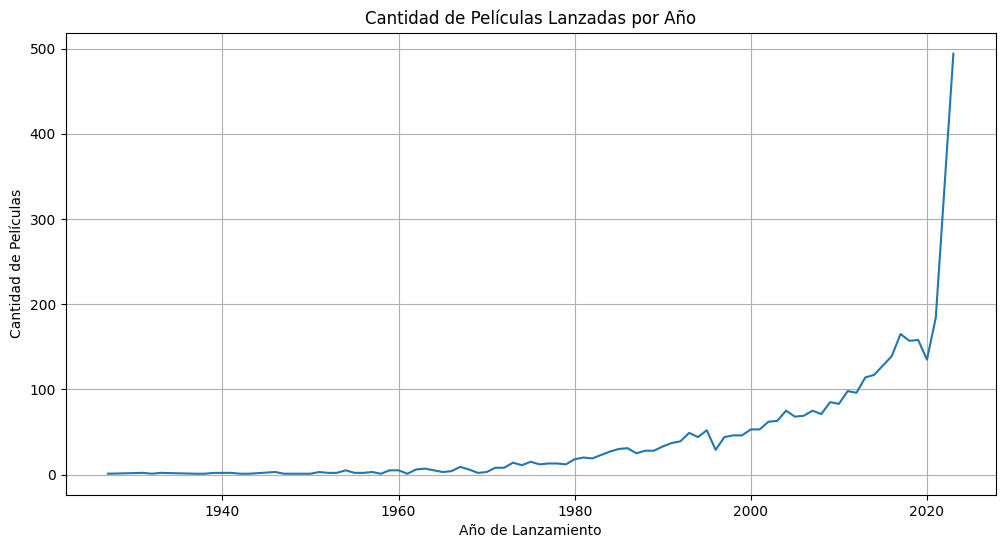

In [20]:
# Agrupamos el df por año de lanzamiento y ccontamos las películas por año
films_by_year = films.groupby('release_year')['film_id'].count()

# Creamos un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(films_by_year.index, films_by_year.values, linestyle='-')

# Etiquetas y título del gráfico
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Cantidad de Películas Lanzadas por Año')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [21]:
import pandas as pd
import plotly.express as px

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'año_de_lanzamiento' y 'id_de_pelicula'

# Agrupa el DataFrame por año de lanzamiento y cuenta las películas por año
films_by_year = films.groupby('release_year')['film_id'].count().reset_index()

# Crea un gráfico de líneas con Plotly
fig = px.line(films_by_year, x='release_year', y='film_id', 
              labels={'año_de_lanzamiento': 'Año de Lanzamiento', 'id_de_pelicula': 'Cantidad de Películas'},
              title='Cantidad de Películas Lanzadas por Año')

# Mostrar el gráfico
fig.show()

## `Series`